In [1]:
from Parser import parse_frames
from scipy.signal import medfilt
from Functions import find_extremas, detect_side, analyse_each_rep
from JointAngles import JointAngles
import numpy as np
import math
import glob
import os
import itertools
import pickle
import matplotlib.pyplot as plt


Starting...
Keypoints from folder: output_points_shoulder_press_correct_1
Frame pose size: 1321
1320
Detected side: front
1320
1320
1320
1320
Number of reps performed LEFT: 26
Number of reps performed RIGHT: 26


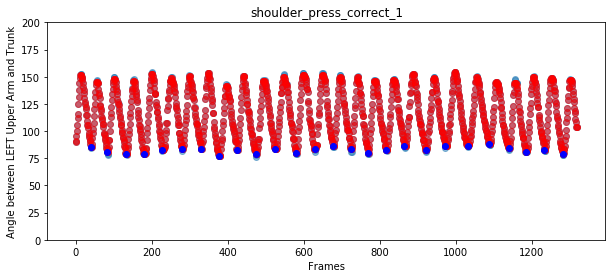

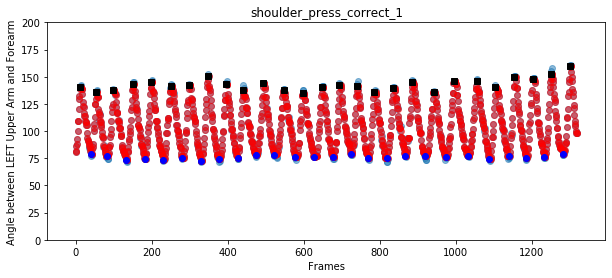

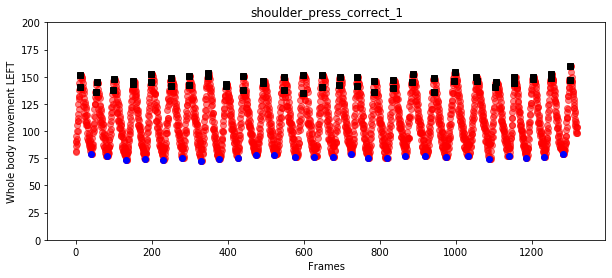

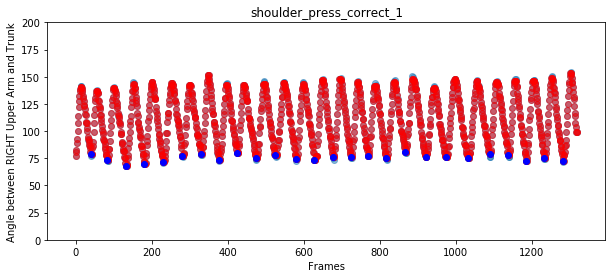

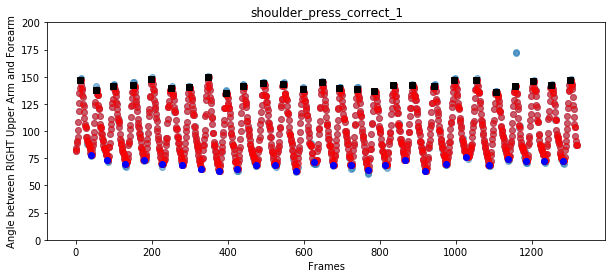

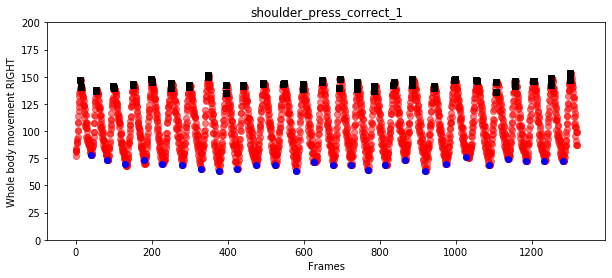


Repetition: 1

Left upper arm - left forearm -> Minimum Angle:78.62132295787062
Left upper arm - left forearm -> Maximum Angle:140.70549147554163
Left upper arm - trunk -> Maximum Angle: 151.78607736351157
Left upper arm - trunk -> Minimum Angle: 85.76925779804874

Right upper arm - left forearm -> Minimum Angle:78.14895818402996
Right upper arm - left forearm -> Maximum Angle:146.65875308105024
Right upper arm - trunk -> Maximum Angle: 140.8087270085961
Right upper arm - trunk -> Minimum Angle: 76.98987075687496


Repetition: 2

Left upper arm - left forearm -> Minimum Angle:77.27464759505156
Left upper arm - left forearm -> Maximum Angle:136.0835221583203
Left upper arm - trunk -> Maximum Angle: 145.20929638530808
Left upper arm - trunk -> Minimum Angle: 84.40152645045849

Right upper arm - left forearm -> Minimum Angle:73.61796337209236
Right upper arm - left forearm -> Maximum Angle:137.73278186035284
Right upper arm - trunk -> Maximum Angle: 136.64270055049687
Right upper arm - t

Frame pose size: 1224
1217
Detected side: front
1217
1217
1217
1217
Number of reps performed LEFT: 16
Number of reps performed RIGHT: 15


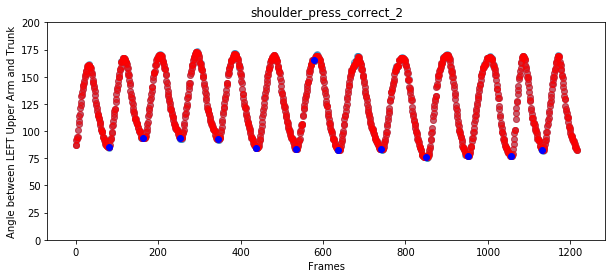

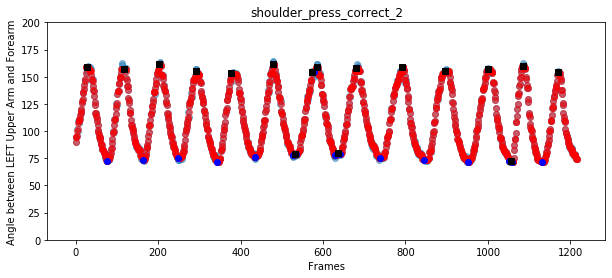

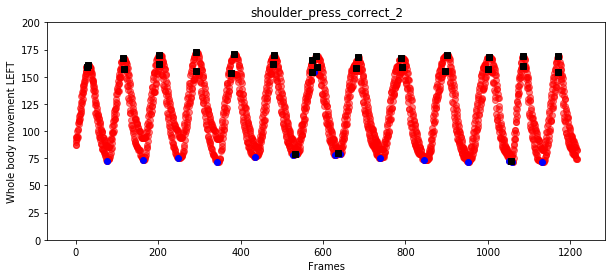

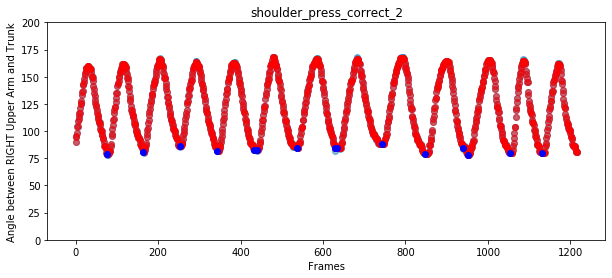

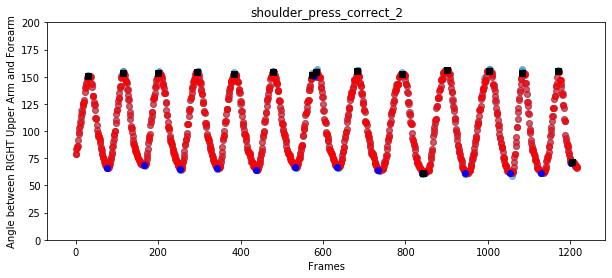

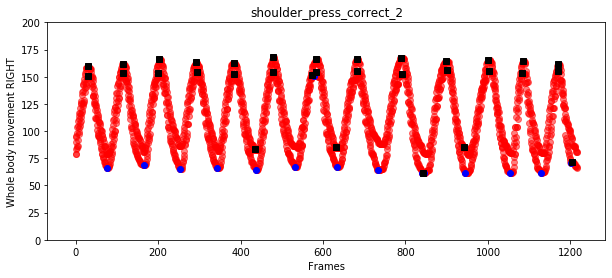

Left and Right maxima points not equal
17
16
Rep counts for left and right are not equal


Starting...
Keypoints from folder: output_points_shoulder_press_correct_3
Frame pose size: 2583
2583
Detected side: front
2583
2583
2583
2583
Number of reps performed LEFT: 48
Number of reps performed RIGHT: 44


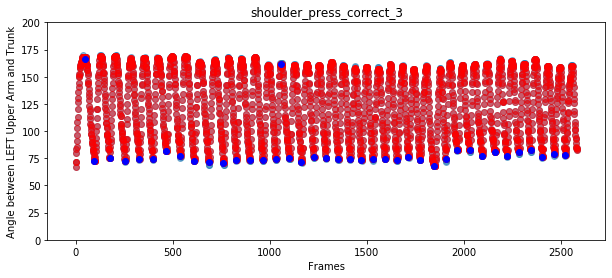

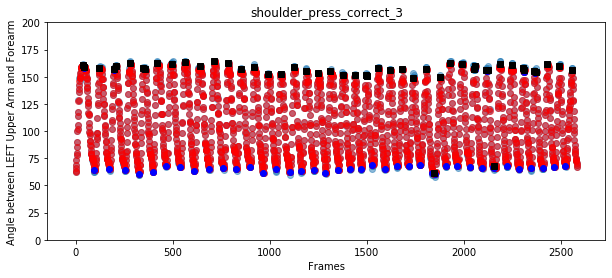

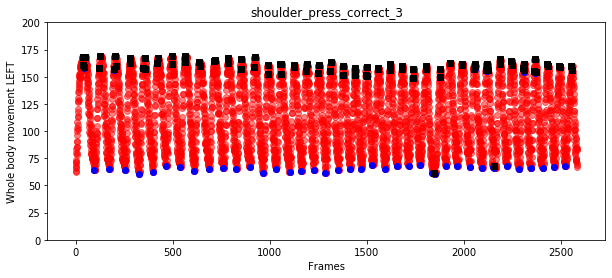

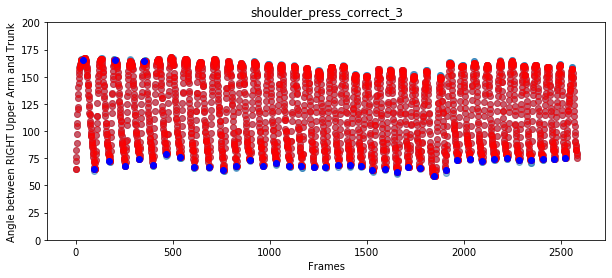

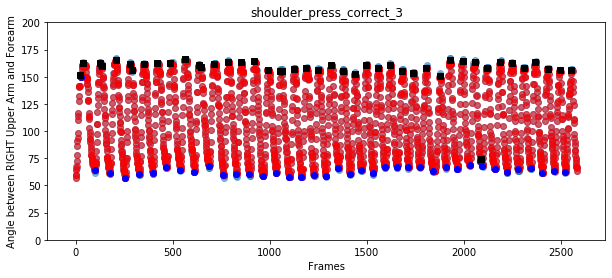

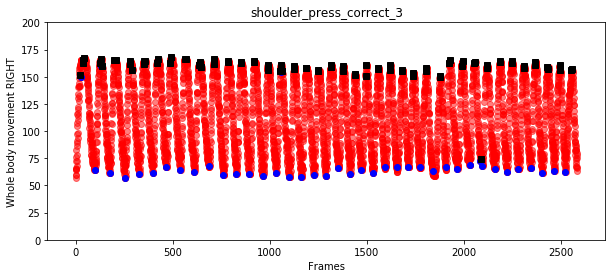

Left and Right maxima points not equal
49
45
Rep counts for left and right are not equal


Starting...
Keypoints from folder: output_points_shoulder_press_correct_4
Frame pose size: 2037
2017
Detected side: front
2017
2017
2017
2017
Number of reps performed LEFT: 44
Number of reps performed RIGHT: 44


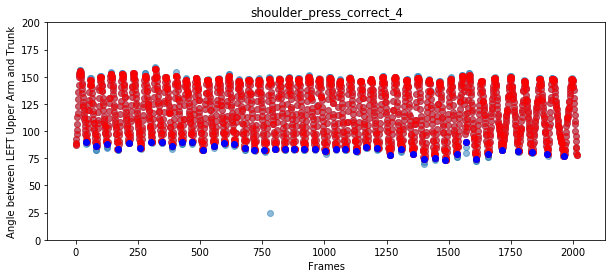

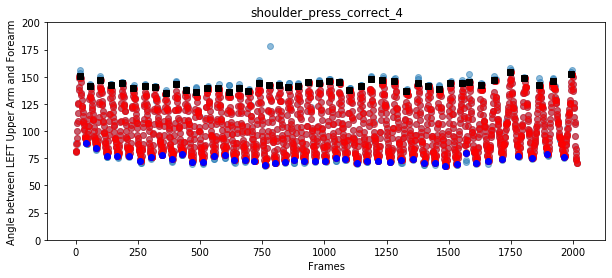

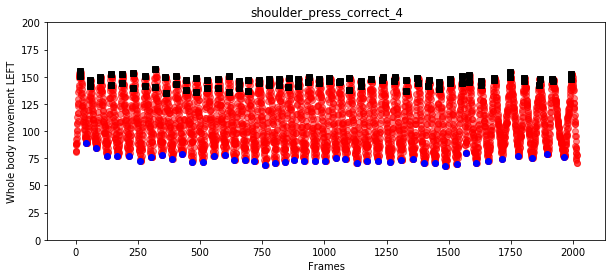

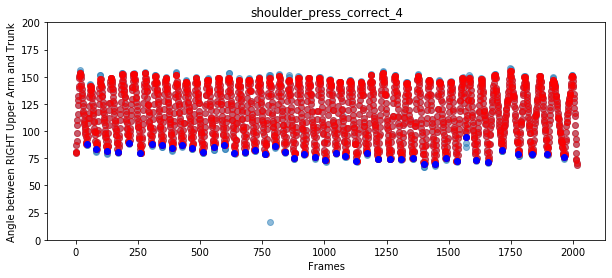

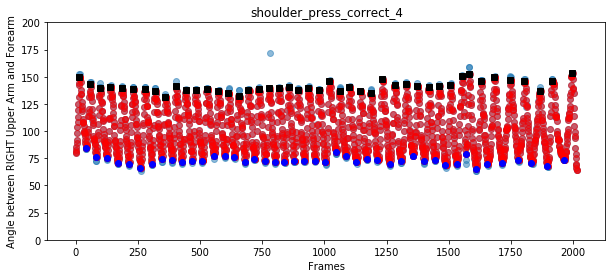

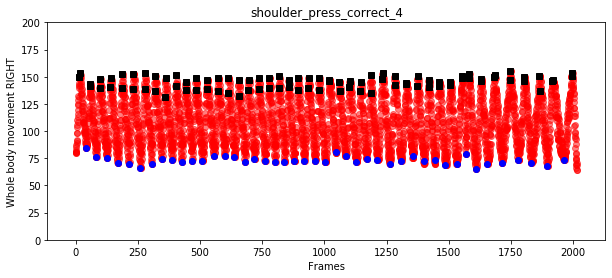


Repetition: 1

Left upper arm - left forearm -> Minimum Angle:80.79103051724778
Left upper arm - left forearm -> Maximum Angle:150.70562506103872
Left upper arm - trunk -> Maximum Angle: 155.29918710635243
Left upper arm - trunk -> Minimum Angle: 87.26522618275735

Right upper arm - left forearm -> Minimum Angle:80.15291344279987
Right upper arm - left forearm -> Maximum Angle:149.57391082521548
Right upper arm - trunk -> Maximum Angle: 153.4452524059934
Right upper arm - trunk -> Minimum Angle: 80.19671760295795


Repetition: 2

Left upper arm - left forearm -> Minimum Angle:84.84257653633307
Left upper arm - left forearm -> Maximum Angle:141.2519067935772
Left upper arm - trunk -> Maximum Angle: 147.30476638898023
Left upper arm - trunk -> Minimum Angle: 85.84108198587104

Right upper arm - left forearm -> Minimum Angle:76.31587552344733
Right upper arm - left forearm -> Maximum Angle:143.72523995469993
Right upper arm - trunk -> Maximum Angle: 141.83678402912895
Right upper arm - t

Frame pose size: 1269
1269
Detected side: front
1269
1269
1269
1269
Number of reps performed LEFT: 20
Number of reps performed RIGHT: 20


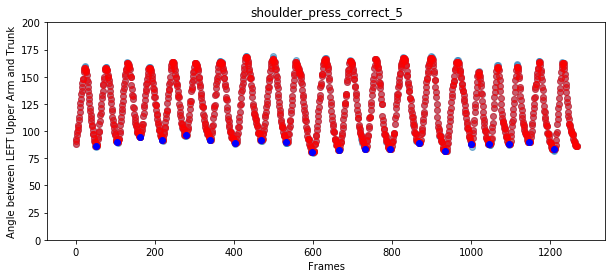

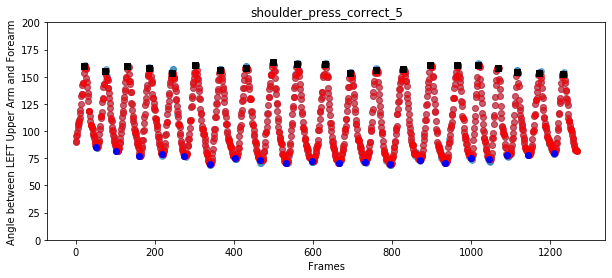

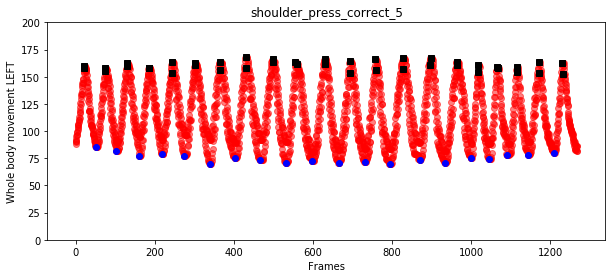

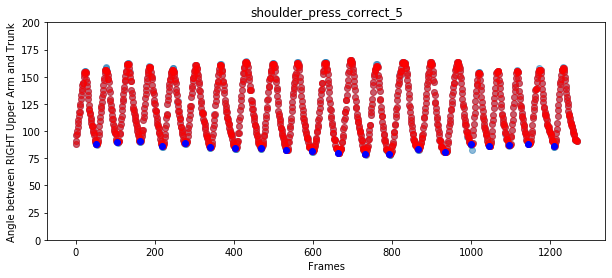

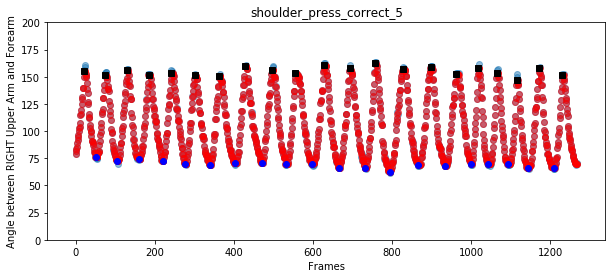

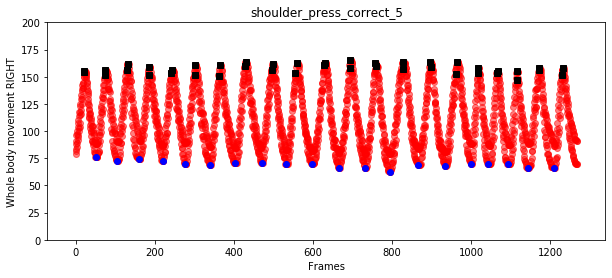


Repetition: 1

Left upper arm - left forearm -> Minimum Angle:85.44072054274575
Left upper arm - left forearm -> Maximum Angle:159.5121976631833
Left upper arm - trunk -> Maximum Angle: 157.66683227900896
Left upper arm - trunk -> Minimum Angle: 86.7133101108453

Right upper arm - left forearm -> Minimum Angle:75.90842423051859
Right upper arm - left forearm -> Maximum Angle:154.98927198057646
Right upper arm - trunk -> Maximum Angle: 153.9357045571848
Right upper arm - trunk -> Minimum Angle: 88.55633433803783


Repetition: 2

Left upper arm - left forearm -> Minimum Angle:81.82824221792738
Left upper arm - left forearm -> Maximum Angle:155.52008869443569
Left upper arm - trunk -> Maximum Angle: 158.3418005352754
Left upper arm - trunk -> Minimum Angle: 86.7133101108453

Right upper arm - left forearm -> Minimum Angle:72.81084761292298
Right upper arm - left forearm -> Maximum Angle:151.97371068862827
Right upper arm - trunk -> Maximum Angle: 156.5547249184059
Right upper arm - trunk

Frame pose size: 1946
1946
Detected side: front
1946
1946
1946
1946
Number of reps performed LEFT: 33
Number of reps performed RIGHT: 32


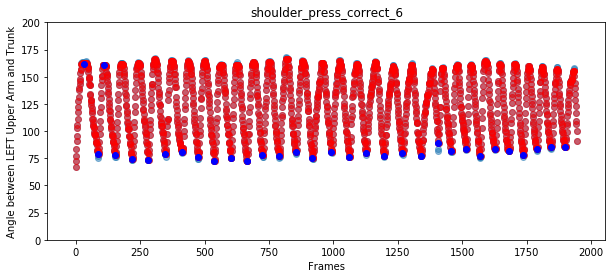

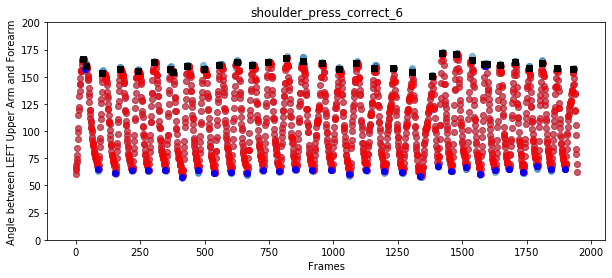

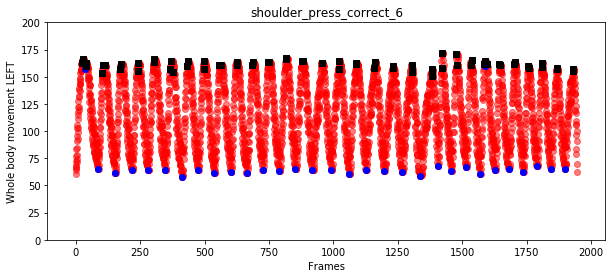

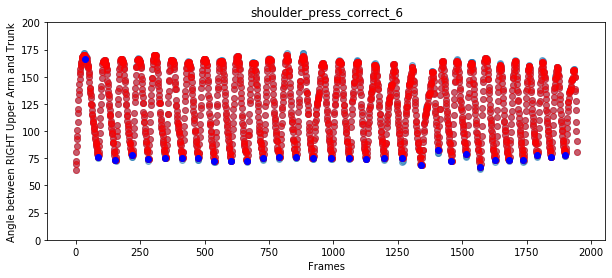

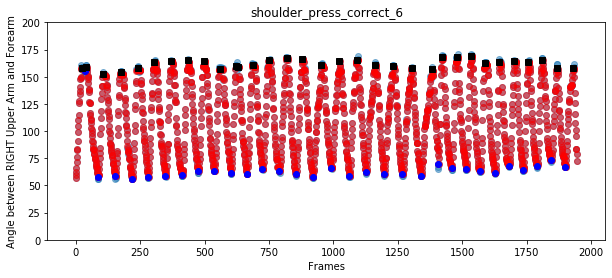

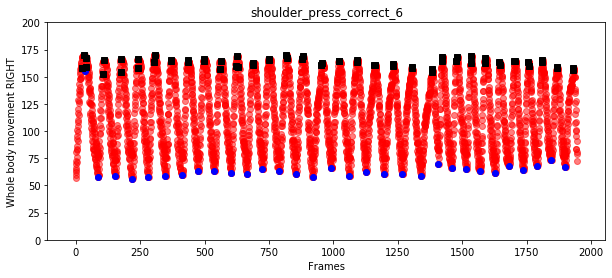

Left and Right maxima points not equal
34
33
Rep counts for left and right are not equal


Starting...
Keypoints from folder: output_points_shoulder_press_correct_7
Frame pose size: 2159
2159
Detected side: front
2159
2159
2159
2159
Number of reps performed LEFT: 50
Number of reps performed RIGHT: 51


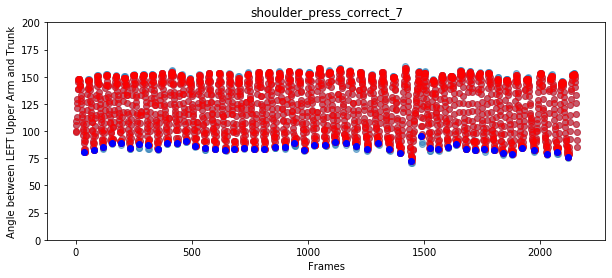

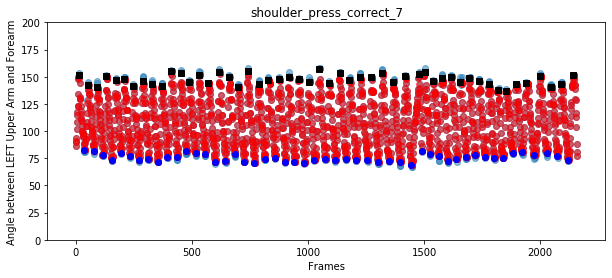

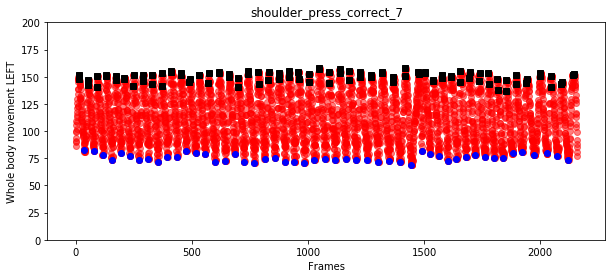

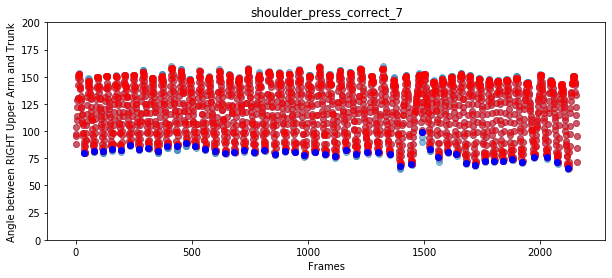

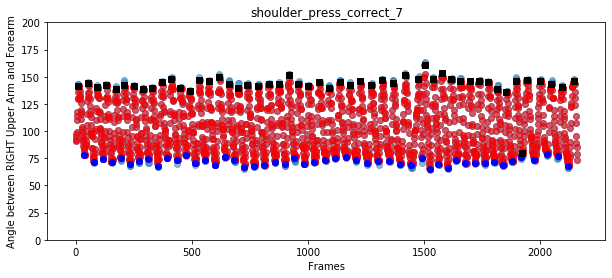

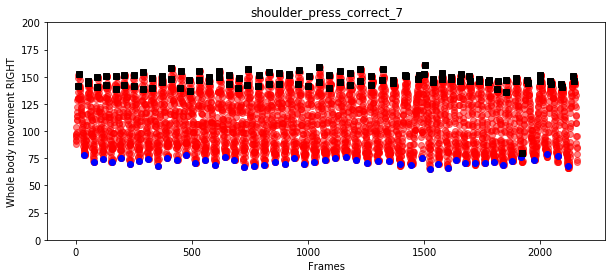

Left and Right maxima points not equal
51
52
Rep counts for left and right are not equal


Starting...
Keypoints from folder: output_points_shoulder_press_correct_8
Frame pose size: 1038
1037
Detected side: front
1037
1037
1037
1037
Number of reps performed LEFT: 19
Number of reps performed RIGHT: 18


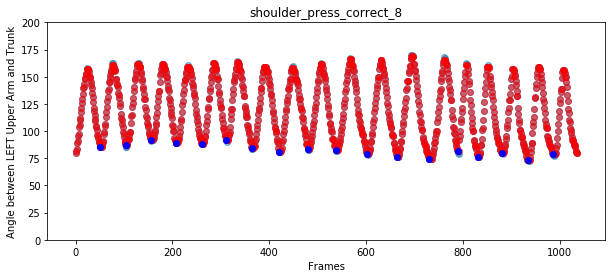

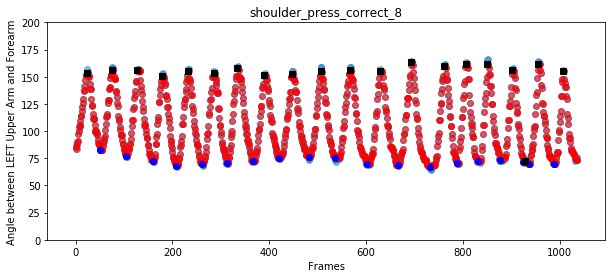

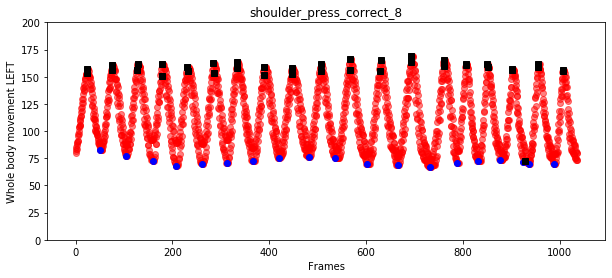

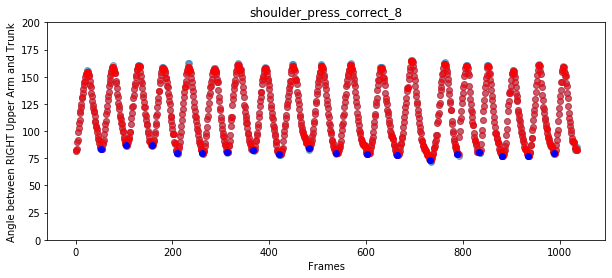

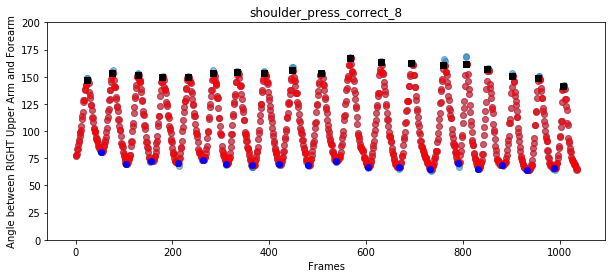

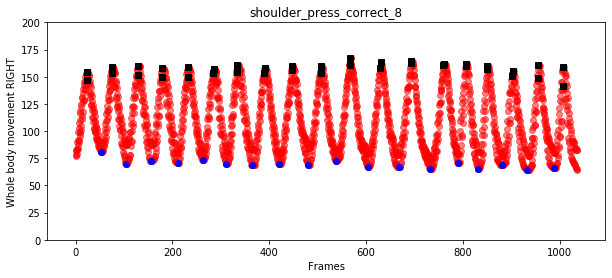

Left and Right maxima points not equal
20
19
Rep counts for left and right are not equal




In [2]:
# modify this path for other videos 
# input_folder = "/home/aleko/Documents/Projects/IndividualProject/bicepvid"
input_folder = "C:\\Users\\altaok\\Documents\\GitHub\\IndividualProject\\keypoints_for_all\\shoulder_press"
# input_folder = 'C:\\Users\\ak5u16\\Desktop\\openpose\\keypoints_for_all\\shoulder_press'
folder_paths = glob.glob(os.path.join(input_folder, 'output_points_shoulder_press_correct*'))     

for folder in folder_paths:
    print("Starting..." + "\nKeypoints from folder: " + os.path.basename(folder))
    video_name = os.path.basename(folder).replace('output_points_', '')
    frame_poses = parse_frames(folder)
       
    joint_angles = JointAngles('shoulder press', frame_poses)
    print('Detected side: ' + joint_angles.side)
   

    left_upArm_trunk_angles = np.array(joint_angles.left_upArm_trunk_angles)
    left_upArm_trunk_angles_filtered = medfilt(medfilt(left_upArm_trunk_angles, 5), 5)
    
    right_upArm_trunk_angles = np.array(joint_angles.right_upArm_trunk_angles)
    right_upArm_trunk_angles_filtered = medfilt(medfilt(right_upArm_trunk_angles, 5), 5)
    
    left_upArm_forearm_angles = np.array(joint_angles.left_upArm_forearm_angles)
    left_upArm_forearm_angles_filtered = medfilt(medfilt(left_upArm_forearm_angles, 5), 5)
    
    right_upArm_forearm_angles = np.array(joint_angles.right_upArm_forearm_angles)
    right_upArm_forearm_angles_filtered = medfilt(medfilt(right_upArm_forearm_angles, 5), 5)
    
    print(left_upArm_trunk_angles_filtered.size)
    print(right_upArm_trunk_angles_filtered.size)
    print(left_upArm_trunk_angles.size)
    print(right_upArm_trunk_angles.size)
        
    # Find left upper arm and trunk maximum angles to detect wrong form 
    left_upArm_trunk_maximas, indexesmax1a = find_extremas(left_upArm_trunk_angles_filtered)
    # print("Largest angles between upper arm and trunk: " + str(upArm_trunk_maximas))
    # Find right upper arm and trunk maximum angles to detect wrong form 
    right_upArm_trunk_maximas, indexesmax1b = find_extremas(right_upArm_trunk_angles_filtered)

    
    # Count repetitions
    left_upArm_forearm_maximas, indexesmax2a = find_extremas(left_upArm_forearm_angles_filtered)    
    # print("Number of maxima points between Upper Arm and Forearm: " + str(upArm_forearm_maximas.size))
    # print(upArm_forearm_maximas)
    
    right_upArm_forearm_maximas, indexesmax2b = find_extremas(right_upArm_forearm_angles_filtered)    
   

    # Find upper arm and forearm minimum points to count reps     
    left_upArm_forearm_minimas, indexesmin1a = find_extremas(left_upArm_forearm_angles_filtered, maxima=False)
    print("Number of reps performed LEFT: " + str(left_upArm_forearm_minimas.size))
    # print(left_upArm_forearm_minimas)
    
    right_upArm_forearm_minimas, indexesmin1b = find_extremas(right_upArm_forearm_angles_filtered, maxima=False)
    print("Number of reps performed RIGHT: " + str(right_upArm_forearm_minimas.size))
    
    left_upArm_trunk_minimass, indexesmin2a = find_extremas(left_upArm_trunk_angles_filtered, maxima=False)
    right_upArm_trunk_maximas, indexesmin2b = find_extremas(right_upArm_trunk_angles_filtered, maxima=False)

   
    # Plot 1 - Left
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(left_upArm_trunk_angles.shape[0]), left_upArm_trunk_angles, alpha=0.5)
    plt.scatter(np.arange(left_upArm_trunk_angles_filtered.shape[0]), left_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between LEFT Upper Arm and Trunk')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200)
    
    # Annontate minima points
    plt.plot(indexesmin2a, left_upArm_trunk_angles_filtered[indexesmin2a], 'bo')
    # print(indexesmax1a)
    plt.show()
    
    # Plot 2 - Left
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(left_upArm_forearm_angles.shape[0]), left_upArm_forearm_angles, alpha=0.5)
    plt.scatter(np.arange(left_upArm_forearm_angles_filtered.shape[0]), left_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between LEFT Upper Arm and Forearm')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    
    # Annotate minima apoints on the graph   
    max_points1a = left_upArm_forearm_angles_filtered[indexesmax2a]
    min_points1a = left_upArm_forearm_angles_filtered[indexesmin1a]
    plt.plot(indexesmin1a, min_points1a, 'bo')
    plt.plot(indexesmax2a, max_points1a, 'ks')

    """
        # Annotate local maximas
        for maxp, indx in zip(max_points, indexesmax2):
            plt.annotate('local max', xy=(indx, maxp), xytext=(indx, maxp+25),
                    arrowprops=dict(facecolor='black', shrink=0.05))

        # Annotate local minimas
        for minp, indx in zip(min_points, indexesmin):
            plt.annotate('local min', xy=(indx, minp), xytext=(indx, minp-35),
                    arrowprops=dict(facecolor='black', shrink=0.05))     
    """
    
    plt.show()
    
    # Plot 3 - All angles LEFT
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(left_upArm_forearm_angles_filtered.shape[0]), left_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.scatter(np.arange(left_upArm_trunk_angles_filtered.shape[0]), left_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Whole body movement LEFT')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    # Annotate minima apoints   
    plt.plot(indexesmin1a, left_upArm_forearm_angles_filtered[indexesmin1a], 'bo')
    plt.plot(indexesmax1a, left_upArm_trunk_angles_filtered[indexesmax1a], 'ks')
    plt.plot(indexesmax2a, left_upArm_forearm_angles_filtered[indexesmax2a], 'ks')  
    plt.show()
   
    
    #---------------------------------------------------------------------------------------------------------------------
    # Same for right side
    
    # Plot 3 - Right
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(right_upArm_trunk_angles.shape[0]), right_upArm_trunk_angles, alpha=0.5)
    plt.scatter(np.arange(right_upArm_trunk_angles_filtered.shape[0]), right_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between RIGHT Upper Arm and Trunk')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200)
    
    # Annontate minima points
    plt.plot(indexesmin2b, right_upArm_trunk_angles_filtered[indexesmin2b], 'bo')
    plt.show()

    # Plot 3 - Right
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(right_upArm_forearm_angles.shape[0]), right_upArm_forearm_angles, alpha=0.5)
    plt.scatter(np.arange(right_upArm_forearm_angles_filtered.shape[0]), right_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between RIGHT Upper Arm and Forearm')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    
    # Annotate minima apoints on the graph   
    max_points1b = right_upArm_forearm_angles_filtered[indexesmax2b]
    min_points1b = right_upArm_forearm_angles_filtered[indexesmin1b]
    plt.plot(indexesmin1b, min_points1b, 'bo')
    plt.plot(indexesmax2b, max_points1b, 'ks')
    
    """
        # Annotate local maximas
        for maxp, indx in zip(max_points1b, indexesmax2b):
            plt.annotate('local max', xy=(indx, maxp), xytext=(indx, maxp+25),
                    arrowprops=dict(facecolor='black', shrink=0.05))

        # Annotate local minimas
        for minp, indx in zip(min_points, indexesmin):
            plt.annotate('local min', xy=(indx, minp), xytext=(indx, minp-35),
                    arrowprops=dict(facecolor='black', shrink=0.05))     
    """
    plt.show()


    # Plot 4 - All angles RIGHT
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(right_upArm_forearm_angles_filtered.shape[0]), right_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.scatter(np.arange(right_upArm_trunk_angles_filtered.shape[0]), right_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Whole body movement RIGHT')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    # Annotate minima apoints     
    plt.plot(indexesmin1b, right_upArm_forearm_angles_filtered[indexesmin1b], 'bo')
    plt.plot(indexesmax1b, right_upArm_trunk_angles_filtered[indexesmax1b], 'ks')
    plt.plot(indexesmax2b, right_upArm_forearm_angles_filtered[indexesmax2b], 'ks')
    plt.show()
   
    
    # Each rep analysis
    # local minimums for upper arm and forearm are min angles in each rep
    analyse_each_rep(string='analysis', extremas1=left_upArm_forearm_minimas, uf_angles1a=left_upArm_forearm_angles_filtered, ut_angles2a=left_upArm_trunk_angles_filtered,
                    extremas2=right_upArm_forearm_minimas, uf_angles1b=right_upArm_forearm_angles_filtered, ut_angles2b=right_upArm_trunk_angles_filtered)
    

    print('\n' + '='*120 + '\n')


In [14]:
a = np.array([1,3,4,5])
index = np.where(a == 3)
print(index[0])
a = np.delete(a, index[0][0])
print(a)


[1]
[1 4 5]


In [15]:
d = {1:'a', 2:'b'}
g = {1:'b', 2:'t'}

ds = [d, g]
a = {}
for k in d.keys():
    a[k] = tuple(d[k] for d in ds)
print(a.items())

dict_items([(1, ('a', 'b')), (2, ('b', 't'))])
